In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi

with open("Data/cars.csv") as file:
    cars = pd.read_csv(file)

cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


model_year
70    AxesSubplot(0.125,0.11;0.775x0.77)
71    AxesSubplot(0.125,0.11;0.775x0.77)
72    AxesSubplot(0.125,0.11;0.775x0.77)
73    AxesSubplot(0.125,0.11;0.775x0.77)
74    AxesSubplot(0.125,0.11;0.775x0.77)
75    AxesSubplot(0.125,0.11;0.775x0.77)
76    AxesSubplot(0.125,0.11;0.775x0.77)
77    AxesSubplot(0.125,0.11;0.775x0.77)
78    AxesSubplot(0.125,0.11;0.775x0.77)
79    AxesSubplot(0.125,0.11;0.775x0.77)
80    AxesSubplot(0.125,0.11;0.775x0.77)
81    AxesSubplot(0.125,0.11;0.775x0.77)
82    AxesSubplot(0.125,0.11;0.775x0.77)
Name: acceleration, dtype: object

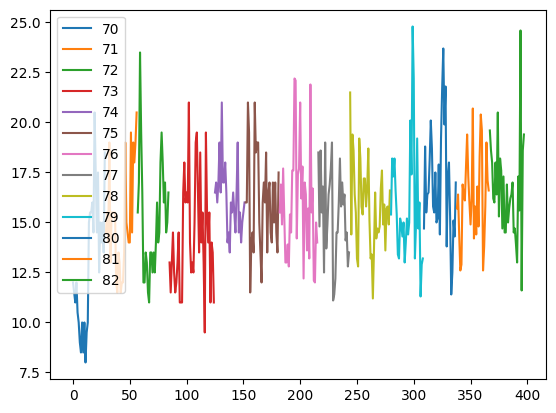

In [3]:
#cars.set_index("model_year", inplace=True)
cars.groupby("model_year")["acceleration"].plot(legend=True)


In [4]:
cars["model_year"].value_counts(sort=False)

70    29
71    28
72    28
73    40
74    27
75    30
76    34
77    28
78    36
79    29
80    29
81    29
82    31
Name: model_year, dtype: int64

In [5]:
cars["origin"].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [6]:
cars["cylinders"].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

<AxesSubplot: xlabel='model_year', ylabel='acceleration'>

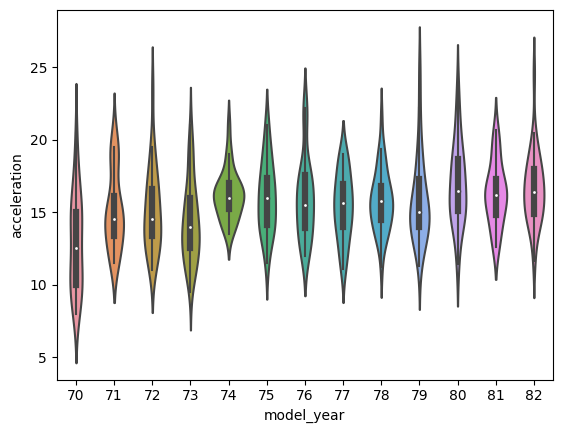

In [7]:
sns.violinplot(data = cars, x="model_year", y="acceleration")

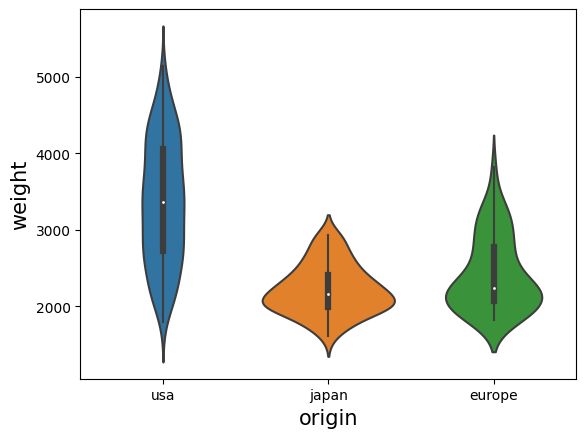

In [8]:
fig = sns.violinplot(data = cars, x="origin", y="weight", )
fig.set_ylabel("weight", fontsize=15)
fig.set_xlabel("origin", fontsize=15)
plt.savefig("images/origin_weight.png")

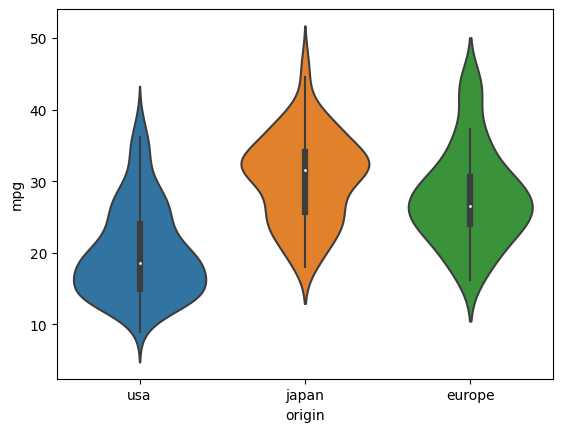

In [9]:
fig = sns.violinplot(data = cars, x="origin", y="mpg")

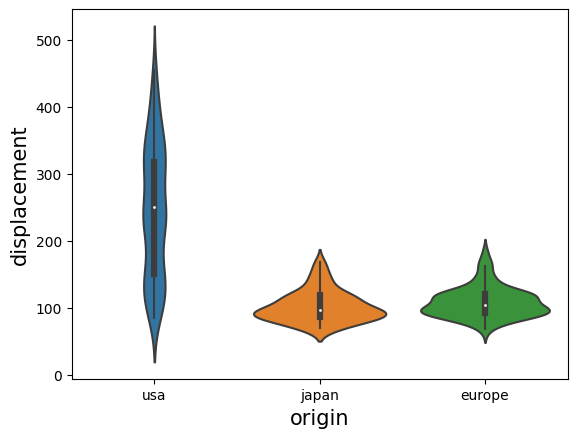

In [10]:
fig = sns.violinplot(data = cars, x="origin", y="displacement", )
fig.set_ylabel("displacement", fontsize=15)
fig.set_xlabel("origin", fontsize=15)
plt.savefig("images/origin_displacement.png")

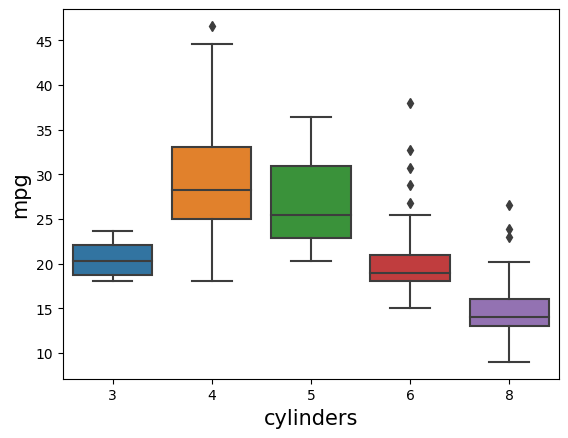

In [11]:
fig = sns.boxplot(data = cars, x="cylinders", y="mpg", )
fig.set_ylabel("mpg", fontsize=15)
fig.set_xlabel("cylinders", fontsize=15)
plt.savefig("images/cylinders_mpg.png")

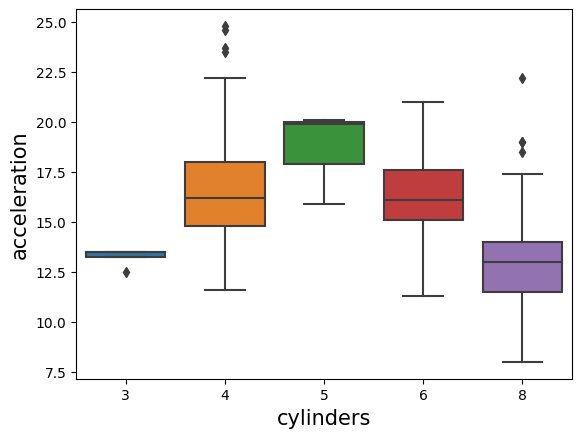

In [12]:
fig = sns.boxplot(data = cars, x="cylinders", y="acceleration", )
fig.set_ylabel("acceleration", fontsize=15)
fig.set_xlabel("cylinders", fontsize=15)
plt.savefig("images/cylinders_acceleration.png")

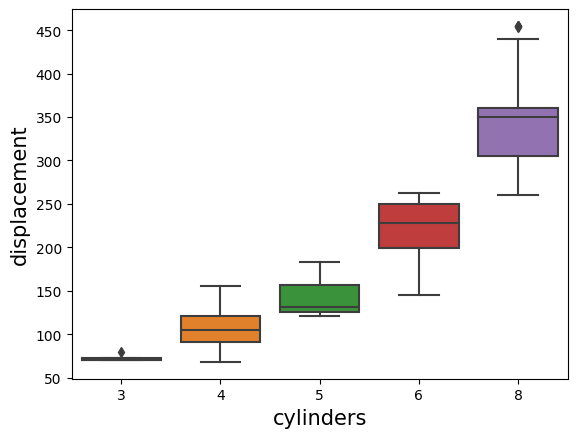

In [13]:
fig = origin_violin = sns.boxplot(data = cars, x="cylinders", y="displacement", )
fig.set_ylabel("displacement", fontsize=15)
fig.set_xlabel("cylinders", fontsize=15)
plt.savefig("images/cylinders_displacement.png")

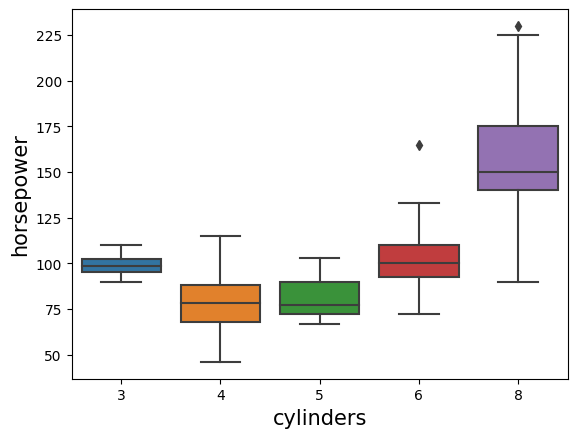

In [14]:
fig = origin_violin = sns.boxplot(data = cars, x="cylinders", y="horsepower")
fig.set_ylabel("horsepower", fontsize=15)
fig.set_xlabel("cylinders", fontsize=15)
plt.savefig("images/cylinders_horsepower.png")

<AxesSubplot: xlabel='origin', ylabel='weight'>

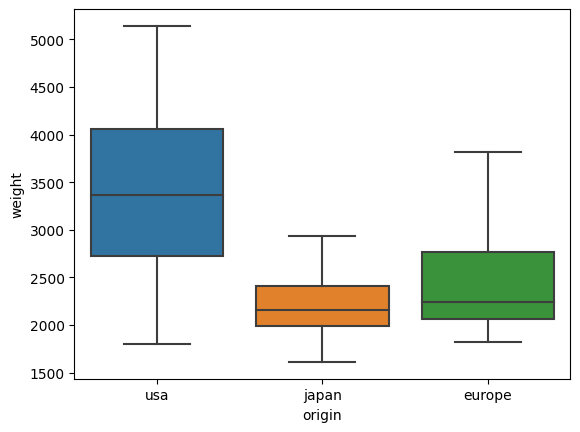

In [15]:
sns.boxplot(data = cars, x="origin", y="weight")

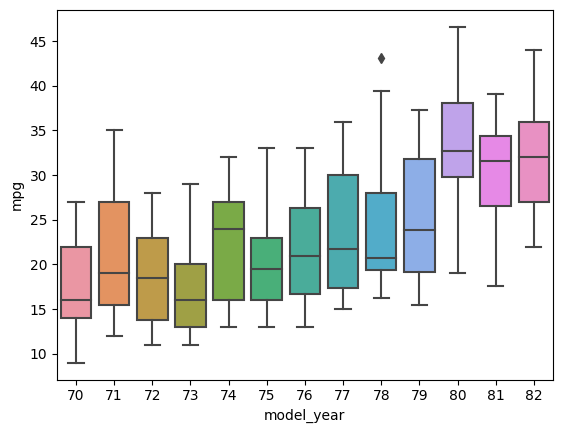

In [16]:
# 74 verkar vara en outlier, undersök vad som är speciellt med det året.

sns.boxplot(data = cars, x="model_year", y="mpg")
plt.savefig("images/boxplot_model_year_mpg.png")

In [17]:

cars_describe = cars.describe()
cars_describe_styled = cars_describe.style.background_gradient()
dfi.export(cars_describe, "images/cars_describe.png")
